# Loading images from the Quick Draw Dataset 20k examples


get the data at https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap?pli=1


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
import keras.backend as K

import tensorflow as tf

import os
import pickle
import numpy as np

Using TensorFlow backend.


In [2]:
print(keras.__version__)
print(tf.__version__)

2.0.8
1.3.0


In [3]:
num_examples_per_class = 10000

#classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe','banana','bandage','barn','baseball bat','baseball',
#           'basket','basketball','bathtub','beach','bear','beard','bed','bee','belt','bicycle','binoculars','birthday cake','blueberry',
#           'book','boomerang','bottlecap','bowtie','bracelet','brain','bread','broom','bulldozer','bus','bus','butterfly','cactus','cake',
#           'calculator','calendar','camel','camera','campfire','candle','cannon','canoe','car','carrot','cello','computer',
#           'cat','chandelier','clock','cloud','coffee cup','compass','cookie','couch','cow','crab','crayon','crocodile','crown',
#           'cup','diamond','dog','dolphin','donut','dragon','dresser','drill','drums','duck','dumbbell','ear','elbow',
#           'elephant','envelope','eraser','eye','eyeglasses','face','fan','feather','fence','finger','fire hydrant',
#           'fireplace','firetruck','fish','flamingo','flashlight','flip flops','floor lamp','flower','flying saucer',
#           'foot','fork']

In [4]:
classes = ['aircraft carrier','airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe','banana','bandage',
           'barn','baseball bat','baseball','basket','basketball','bathtub','beach','bear','beard','bed','bee','belt',
           'bicycle','binoculars','birthday cake','blueberry','book','boomerang','bottlecap','bowtie','bracelet','brain',
           'bread','broom','bulldozer','bus','bush','butterfly','cactus','cake','calculator','calendar','camel','camera',
           'campfire','candle','cannon','canoe','car','carrot','cat','cello','chandelier','clock','cloud','coffee cup',
           'compass','computer','cookie','couch','cow','crab','crayon','crocodile','crown','cup','diamond','dog',
           'dolphin','donut','dragon','dresser','drill','drums','duck','dumbbell','ear','elbow','elephant','envelope',
           'eraser','eye','eyeglasses','face','fan','feather','fence','finger','fire hydrant','fireplace','firetruck',
           'fish','flamingo','flashlight','flip flops','floor lamp','flower','flying saucer','foot','fork','frog',
           'frying pan','garden hose','garden','giraffe','goatee','golf club','grapes','grass','guitar','hamburger',
           'hammer','hand','harp','hat','headphones','hedgehog','helicopter','helmet','hexagon','hockey puck',
           'hockey stick','horse','hospital','hot air balloon','hot dog','hot tub','hourglass','house plant','house',
           'hurricane','ice cream','jacket','jail','kangaroo','key','keyboard','knee','knife','ladder','lantern',
           'laptop','leaf','leg','light bulb','lighter','lighthouse','lightning','line','lion','lipstick','lobster',
           'lollipop','mailbox','map','marker','matches','megaphone','mermaid','microphone','microwave','monkey',
           'moon','mosquito','motorbike','mountain','mouse','moustache','mouth','mug','mushroom','nail','necklace',
           'nose','ocean','octagon','octopus','onion','oven','owl','paint can','paintbrush','palm tree','panda',
           'pants','paper clip','parachute','parrot','passport','peanut','pear','peas','pencil','penguin','piano',
           'pickup truck','picture frame','pig','pillow']

In [5]:
len(classes)

200

## Load the image data from scratch

Only use if you are downloading the raw data and doing it yourself

In [ ]:
#This cell is only if you are loading the data from scratch
# get the data 
quickdraws = [np.load("../../data/{}.npy".format(qdraw))[:num_examples_per_class] for qdraw in classes]

# Concat the arrays together
x_data = np.concatenate(quickdraws,axis=0)

x_data.shape

In [ ]:
np.save('x_data_100_classes_10k.npy',x_data)

## Use this cell to load the premade datasets that I made

In [6]:
x_data = np.load("../x_data_200_classes_10k.npy")

In [7]:
x_data.shape

(2000000, 784)

## Lets make some labels for our data

In [8]:
labels = [np.full((num_examples_per_class,), classes.index(qdraw)) for qdraw in classes]
print(len(labels))
print(labels[1])
## Concat the arrays together
y_data = np.concatenate(labels,axis=0)
y_data.shape
print(y_data[9999], y_data[10000])

200
[1 1 1 ..., 1 1 1]
0 1


## Let's look at the Images 

In [17]:
def show_object(obj):
    # Reshape 784 array into 28x28 image
    image = obj.reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(image, cmap='gray_r')
    plt.show()

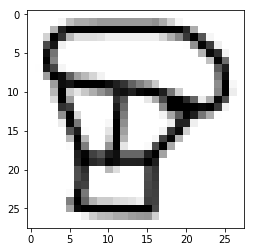

125


In [18]:
show_object(x_data[53000])
print(y_data[53000])

In [19]:
print(x_data.shape)
print(y_data.shape)

(2000000, 784)
(2000000,)


In [20]:
#shuffling function
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [21]:
x_data,y_data = unison_shuffled_copies(x_data,y_data)

In [22]:
y_data[0]
print(classes[y_data[0]])

basketball


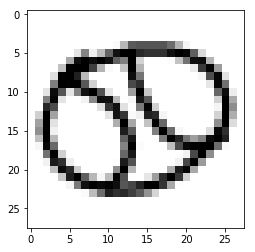

In [23]:
show_object(x_data[0])

## Normalize the input

In [24]:
#print(x_data[0])
print(x_data.shape)
x_data_norm = x_data.reshape(x_data.shape[0], 28, 28, 1)
x_data_norm = x_data_norm/255
print(x_data_norm.shape)
#print(x_data_norm[0])

(2000000, 784)
(2000000, 28, 28, 1)


## One-hot encode the output

In [25]:
import keras
print(y_data.shape)
print(y_data[0])
y_data_onehot = keras.utils.to_categorical(y_data, len(classes))
print(y_data_onehot.shape)
print(y_data_onehot[0])

(2000000,)
15
(2000000, 200)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


## Create training and testing datasets

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data_norm, y_data_onehot,
                                                    test_size=0.15, random_state=0)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1700000, 28, 28, 1) (300000, 28, 28, 1)
(1700000, 200) (300000, 200)


## Create a small sample to just make sure the NN is working/converging

In [27]:
# Below code always cause memory error in the AWS GPU instance
#x_train_small,_,y_train_small,_ = train_test_split(x_train, y_train, 
#                                                   test_size=0.95, random_state=0)
#_,x_test_small,_,y_test_small = train_test_split(x_test, y_test,
#                                              test_size=0.05, random_state=0)
#print(x_train_small.shape, x_test_small.shape)
#print(y_train_small.shape, y_test_small.shape)

## Build and compile the neural network

In [28]:
n_input = 28,28,1
n_classes = len(classes)

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Dense
from keras.models import Model

Inp = Input(shape=(n_input))
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', name='conv1')(Inp)
x = MaxPooling2D(pool_size=3, name='maxpool1')(x)
#x = Dropout(0.3)(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', name='conv2')(x)
x = MaxPooling2D(pool_size=3, name='maxpool2')(x)
#x = Dropout(0.3)(x)
#x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', name='conv3')(x)
#x = GlobalAveragePooling2D(name='avgpool1')(x)
#x = MaxPooling2D(pool_size=3, name='maxpool3')(x)
x = Dropout(0.3)(x)
x = Flatten()(x)
x = Dense(200, activation='relu', name='Dense1')(x)
output = Dense(n_classes, activation='softmax', name='output')(x)

model = Model(Inp, output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 9, 9, 32)          0         
_________________________________________________________________
conv2 (Conv2D)               (None, 9, 9, 64)          18496     
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [29]:
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])

## Train the model, checkpoint, reduce_lr, early_stopping callbacks are used
One epoch takes about 120 seconds on nvidia GTX1070. It reached 71.1% accuracy after 82 iterations.

In [31]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LambdaCallback, EarlyStopping
import keras.backend as K

checkpointer = ModelCheckpoint(filepath='quickdraw-200class-10k.h5', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, min_lr=0.0001)
lr_print = LambdaCallback(on_epoch_begin=lambda epoch,logs: print("lr:", K.eval(model.optimizer.lr)))
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,mode='auto')

history = model.fit(x_train, y_train,
                   batch_size=100, epochs=50,
                   verbose=1, validation_data=(x_test, y_test),
                   callbacks=[checkpointer, reduce_lr, lr_print, early_stopping])

Train on 1700000 samples, validate on 300000 samples
lr: 0.01
Epoch 1/50
1700000/1700000 [==============================] - 116s - loss: 1.3358 - acc: 0.6688 - val_loss: 1.2024 - val_acc: 0.7050
lr: 0.01
Epoch 2/50
1700000/1700000 [==============================] - 117s - loss: 1.3331 - acc: 0.6699 - val_loss: 1.1993 - val_acc: 0.7049
lr: 0.01
Epoch 3/50
1700000/1700000 [==============================] - 116s - loss: 1.3320 - acc: 0.6698 - val_loss: 1.2000 - val_acc: 0.7048
lr: 0.01
Epoch 4/50
1700000/1700000 [==============================] - 116s - loss: 1.3302 - acc: 0.6700 - val_loss: 1.1972 - val_acc: 0.7057
lr: 0.01
Epoch 5/50
1700000/1700000 [==============================] - 116s - loss: 1.3281 - acc: 0.6707 - val_loss: 1.1941 - val_acc: 0.7062
lr: 0.01
Epoch 6/50
1700000/1700000 [==============================] - 115s - loss: 1.3267 - acc: 0.6710 - val_loss: 1.1953 - val_acc: 0.7065
lr: 0.01
Epoch 7/50
1700000/1700000 [==============================] - 115s - loss: 1.3254 - ac

1700000/1700000 [==============================] - 116s - loss: 1.3014 - acc: 0.6768 - val_loss: 1.1727 - val_acc: 0.7114
lr: 0.01
Epoch 28/50
1700000/1700000 [==============================] - 116s - loss: 1.3012 - acc: 0.6766 - val_loss: 1.1708 - val_acc: 0.7119
lr: 0.01
Epoch 29/50
1700000/1700000 [==============================] - 116s - loss: 1.3002 - acc: 0.6765 - val_loss: 1.1736 - val_acc: 0.7112
lr: 0.01
Epoch 30/50
1700000/1700000 [==============================] - 115s - loss: 1.2992 - acc: 0.6772 - val_loss: 1.1719 - val_acc: 0.7105
lr: 0.01
Epoch 31/50
1700000/1700000 [==============================] - 115s - loss: 1.2984 - acc: 0.6768 - val_loss: 1.1719 - val_acc: 0.7110
lr: 0.01
Epoch 32/50
1700000/1700000 [==============================] - 115s - loss: 1.2972 - acc: 0.6772 - val_loss: 1.1709 - val_acc: 0.7112
Epoch 00031: early stopping


## Plot the training and validation/testing accuracy

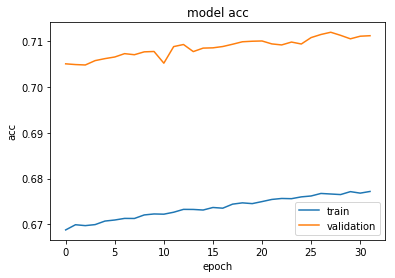

In [32]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)
    
plot_train(history)

In [33]:
# Test against x_test and y_test dataset. Top one result.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.17087997942
Test accuracy: 0.71116


If considering the top 5 returned predictions, the accuracy reached 90.0%.

In [34]:
def get_top_n_rate(model, n, x_test, y_test):
    # Get the prediction matrix of all the testing data points
    predict_prob = model.predict(x_test)
    # Get the top n index matrix
    top_n = np.argsort(predict_prob)[:, :-n-1:-1]
    
    found = .0
    for i in range(len(top_n)):
        curIndex = np.argmax(y_test[i])
        if curIndex in top_n[i]:
            # Increase 'found' if the index of the test case is found in the top n
            found += 1
    return found/len(top_n)

In [35]:
# Subset a small portion of test dataset.
print('\nTop 1 accuracy:', model.evaluate(x_test, y_test)[1])
print('Top 5 accuracy:', get_top_n_rate(model, 5, x_test, y_test))

299680/300000 [============================>.] - ETA: 0s
Top 1 accuracy: 0.71116
Top 5 accuracy: 0.8997533333333333


## Save and load the model

In [21]:
#model.save('quickdraw-100class-10k.h5')
model = keras.models.load_model('quickdraw-100class-10k.h5')

/Users/victor/anaconda/envs/tfkeras/lib/python3.5/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '
